In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error 
from sklearn.ensemble import ExtraTreesClassifier
import pickle
from math import sqrt

data = pd.read_pickle('../data/data.pickle')

# Preparación datasets de entrenamiento y test

In [2]:
# separar dataset de entrenamiento de dataset de test
# Output: df_data_test, df_data_train


# Paso 1: Listas que contiene rutas de entrenamiento y test

size_data_test = round(len(data) * 0.2)

data_test = []
for i in range(0, size_data_test):
    data_test.append(data[i])    

    
data_train = []
for i in range(size_data_test, len(data)):
    data_train.append(data[i]) 
    

# Paso 2: Dataframe que contiene las rutas de entrenamiento y test
data_test_routes = []
for route in data_test:
    data_test_routes.append(pd.DataFrame(route))
    
df_data_test = pd.concat(data_test_routes, ignore_index=True)
df_data_test.info()


data_train_routes = []
for route in data_train:
    data_train_routes.append(pd.DataFrame(route))
    
df_data_train = pd.concat(data_train_routes, ignore_index=True)
df_data_train.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730163 entries, 0 to 730162
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   LATITUD        730163 non-null  float64
 1   LONGITUD       730163 non-null  float64
 2   VELOCIDAD      730163 non-null  float64
 3   distance       730163 non-null  float64
 4   Av.Speed       730163 non-null  float64
 5   Time_Av.Speed  730163 non-null  float64
 6   ChangeInSpeed  730163 non-null  float64
 7   length         730163 non-null  int64  
 8   width          730163 non-null  int64  
 9   to_Arrive      730163 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 55.7 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3031831 entries, 0 to 3031830
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   LATITUD        3031831 non-null  float64
 1   LONGITUD       3031831 non-null  float64
 

<ipython-input-2-97f34e252ae9>:33: FutureWarning: null_counts is deprecated. Use show_counts instead
  df_data_train.info(null_counts=True)


In [3]:
df_data_train = df_data_train.rename(columns={'LATITUD': 'Latitude', 'LONGITUD': 'Longitude', 'VELOCIDAD':'Speed', 'distance':'Distance', 'length':'Length', 'width':'Width'})
df_data_test = df_data_test.rename(columns={'LATITUD': 'Latitude', 'LONGITUD': 'Longitude', 'VELOCIDAD':'Speed', 'distance':'Distance', 'length':'Length', 'width':'Width'})

df_data_train.to_Arrive = df_data_train.to_Arrive.round()

# Selección de features
X_test = df_data_test[['Longitude', 'Latitude', 'Speed', 'Length', 'Width']]  
y_test = df_data_test["to_Arrive"].values.reshape(-1, 1)

X_train = df_data_train[['Longitude', 'Latitude', 'Speed', 'Length', 'Width']]
y_train = df_data_train["to_Arrive"].values.reshape(-1, 1)

# Random Forest Regressor

In [4]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler()
y_scaler = StandardScaler()

X_train = X_scaler.fit_transform(X_train)
y_train = y_scaler.fit_transform(y_train)

X_test = X_scaler.fit_transform(X_test)
y_test = y_scaler.fit_transform(y_test)

In [5]:
from sklearn.ensemble import RandomForestRegressor
n_estimators=150

rforest=RandomForestRegressor(n_estimators, random_state = 0)
rforest=rforest.fit(X_train,y_train.ravel())  #.ravel()
y_train_hat = rforest.predict(X_train)
y_test_hat=rforest.predict(X_test)

# Validation metrics

In [6]:
from sklearn.metrics import r2_score
# Calculamos el error
print("Entrenamiento", r2_score(y_train, y_train_hat))
print("Prueba", r2_score(y_test, y_test_hat))

Entrenamiento 0.9726897424337871
Prueba 0.5308900394443054


In [7]:
#inverse_transform. No hay orden de magnitud

y_test = y_scaler.inverse_transform(y_test)
y_test_hat = y_scaler.inverse_transform(y_test_hat)

mae = mean_absolute_error(y_test, y_test_hat)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 27.231152312751473


In [8]:
#inverse_transform
mse = mean_squared_error(y_test, y_test_hat)
print("Mean Squared Error:", mse)

Mean Squared Error: 2138.488325276531


In [9]:
rmse = sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 46.243792289090344


In [12]:
error = abs(y_test_hat - y_test)

MemoryError: Unable to allocate 3.88 TiB for an array with shape (730163, 730163) and data type float64

C:\Users\usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


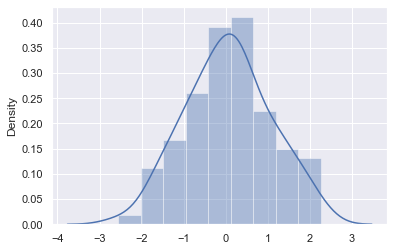

In [1]:
# Calcular el error como valor real - valor predicho.
# Representar en gráfico de distribución. Para ver la distribución de los errores.
# Lo ideal es obtener una campana muy estrecha y centrada en 0.

import seaborn as sns, numpy as np
sns.set_theme(); np.random.seed(0)
ax = sns.distplot(error)



# Save model

In [9]:
pickle.dump(rforest, open('models/rforest_model.sav', 'wb'))
pickle.dump(X_scaler, open('models/rforest_X_scaler.sav', 'wb'))
pickle.dump(y_scaler, open('models/rforest_y_scaler.sav', 'wb'))